#### 모델 : 생선 품종 분류 모델
- 데이터 : fish.csv (2가지 품종의 생선 데이터)
- 피  쳐 : Weight, Length
- 타  겟 : Species
- 학습유형: 지도학습 + 분류 (도미, 빙어 분류는 이진 분류)
- 최적의 K 즉, 이웃 데이터 수 찾기 코드 추가

(1) 모듈 로딩 & 데이터 준비

In [23]:
import pandas as pd                                     #데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      #기계학습 관련 모듈

In [26]:
data_file = 'fish.csv'

In [27]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols = [0,1,2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [28]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt']) #Boolean Indexing

#해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.index

# 인덱스 정리
twoFishDF.reset_index(drop=True,inplace =True)
twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(2) 데이터 전처리 <hr>
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피쳐 스케일링

In [29]:
# 표준 정규분포 => 평균 0, 표준편차 1 이 되는 정규분포를 말함.
# 정규분포를 하려면 => Z-score = 피쳐 - 평균 / 표준편차 (여기서 z-score라 함은 표준화된 데이터를 가리킴)
twoFishDF.describe()

,Weight,Length
count,49.000000,49.000000
mean,444.500000,27.055102
std,328.143233,10.242804
min,6.700000,9.800000
25%,19.700000,14.300000
50%,500.000000,31.000000
75%,700.000000,34.500000
max,1000.000000,41.000000


In [30]:
# Weight 컬럼
twoFishDF.Weight.mean(), twoFishDF.Weight.std()

(444.5, 328.1432328267642)

In [31]:
ret1 = twoFishDF.Weight - twoFishDF.Weight.mean()
ret1 = ret1/twoFishDF.Weight.std()
#twoFishDF.loc[:, 'Weight'] = ret1

In [32]:
# Length 컬럼
twoFishDF.Length.mean(), twoFishDF.Length.std()

(27.055102040816323, 10.242803596193967)

In [33]:
ret2 = twoFishDF.Length - twoFishDF.Length.mean()
ret2 = ret2/twoFishDF.Length.std()
#twoFishDF.loc[:, 'Length'] = ret2

In [34]:
# 하! 지! 만! 이걸 다~ 해주는 모듈이 있다.

(3) 기계학습 데이터셋 준비 => 피쳐 + 타겟 분리 <hr>

In [35]:
# 피쳐/특성/속성 데이터 추출
featureDF = twoFishDF[twoFishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,242.0,25.4
1,290.0,26.3


In [36]:
# 클래스/타켓/라벨 데이터 추출 후 수치화하기 (정수 인코딩)
targetDF = twoFishDF['Species']
targetDF.head(2)

0    Bream
1    Bream
Name: Species, dtype: object

In [37]:
targetDF = targetDF.replace({'Bream': 0, 'Smelt':1})
targetDF.dtype, targetDF.head(2)

(dtype('int64'),
 0    0
 1    0
 Name: Species, dtype: int64)

(3-1) 학습/테스트 데이터셋 분리 <hr>
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80 : 20

In [38]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetDF, 
                                                    test_size = 0.2, 
                                                    stratify = targetDF)

In [40]:
# 학습 및 테스트 데이터셋 확인
print('학습용 데이터셋')
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}") #X,y의 shape에서 행의 숫자부분이 서로 동일한가 확인함
print()
print(y_train.value_counts()/y_train.shape[0])
print()
print('테스트용 데이터셋')
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

학습용 데이터셋
X_train.shape: (39, 2)
y_train.shape: (39,)

Species
0    0.717949
1    0.282051
Name: count, dtype: float64

테스트용 데이터셋
X_test.shape: (10, 2)
y_test.shape: (10,)


(3-2) 피쳐 데이터의 스케일링 <hr>
- 피쳐들의 값의 범위가 다른 것을 통일시켜줌
- scikit-learn의 preprocessing 모듈 활용

In [41]:
# 모듈로딩
from sklearn.preprocessing import StandardScaler

In [42]:
# 표준 정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit( ) 메서드
# (3) 데이터에 대한 스케일링 진행 : transform( ) 메서드

In [43]:
scaler = StandardScaler()
scaler

StandardScaler()

In [44]:
scaler.fit(X_train)

StandardScaler()

In [45]:
scaler.mean_

array([436.43589744,  27.04358974])

In [46]:
# 학습용 데이터 피쳐 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [47]:
# 테스트용 데이터 피쳐 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

# X_test는 fit 할 필요가 없다. (검증용이니까)
# X_train을 fit한 상태에서 그 후에 스케일링을 진행한것이기 때문이다.

(10, 2)

(3-3) 시각화

In [48]:
# 모듈로딩
import matplotlib.pyplot as plt

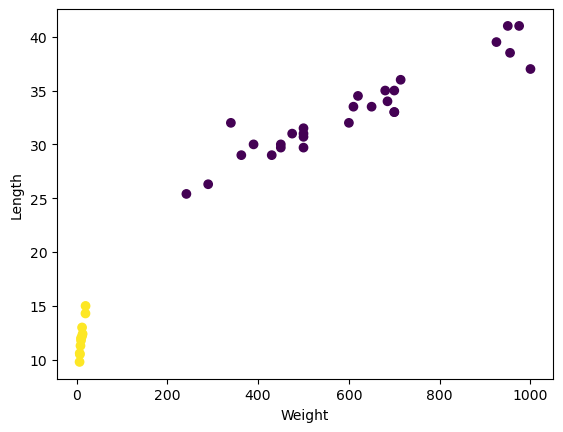

In [49]:
## => 원본 데이터 시각화
plt.scatter(X_train['Weight'], X_train['Length'],  c= y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

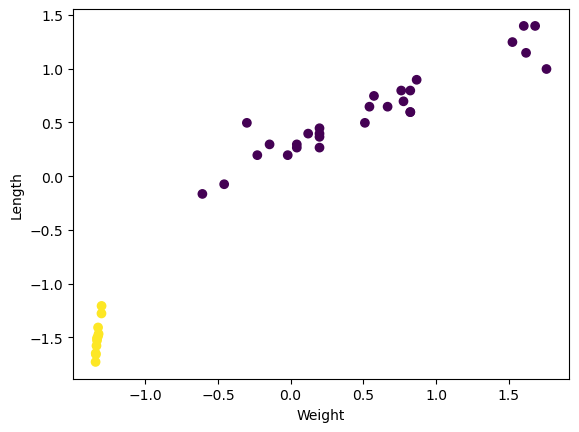

In [50]:
## -> 스케일된 데이터의 시각화
#scaled_x_test
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c = y_train)
#스케일링된 넘은 np array 타입이라 이렇게 접근해야함

plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(4) 학습 진행

In [53]:
# 방법 (1) : KNN알고리즘
# 모델 성능 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
## n_neighbors 즉 k 개수 : 1 ~ 전체 데이터 수
max_k = scaled_X_train.shape[0]

test_scoreList = []
train_scoreList =[]
for k in range(1, max_k+1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    model.score(scaled_X_test, y_test)
    train_scoreList.append(model.score(scaled_X_train, y_train))
    test_scoreList.append(model.score(scaled_X_test, y_test))

In [54]:
# 학습 및 테스트 데이터에 대한 점수 확인.
print(f'Train Score : {train_scoreList}')
print(f'Test Score : {test_scoreList}')

Train Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]
Test Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


In [ ]:
## 방법(2) : SVC 알고리즘
from sklearn.svm import SVC

# 학습
fishModel2 = SVC()
fishModel2.fit(scaled_X_train, y_train)

#어떤 알고리즘이 더 나은가는 score 해서 비교해보면 된다.

SVC()

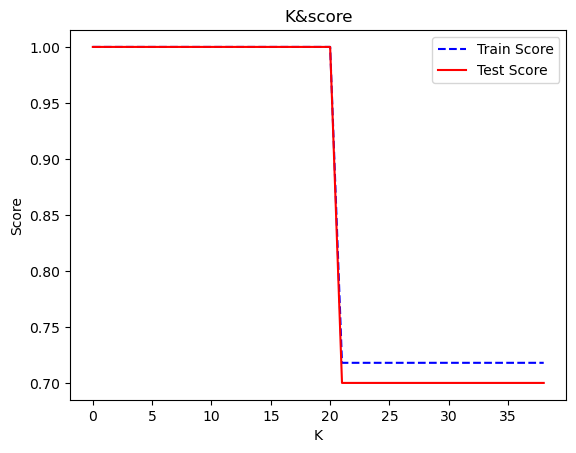

In [58]:
# K개수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label = 'Train Score')
plt.plot(test_scoreList, 'r-', label = 'Test Score')
plt.title('K&score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
## 방법(3) : 
from sklearn.linear_model import LogisticRegression

fishModel3 = LogisticRegression()
fishModel3.fit(scaled_X_train, y_train)


LogisticRegression()

(5) 테스트 진행

In [ ]:
print('KNN', fishModel.score(scaled_X_test, y_test))

KNN 1.0


In [ ]:
print('SVC ', fishModel2.score(scaled_X_test, y_test))

SVC  1.0


In [ ]:
print('LogisticRegression ', fishModel3.score(scaled_X_test, y_test))

LogisticRegression  1.0


(6) 예측

In [1]:
# 생선 무게, 길이 입력 받은 후 결과 반화
input('생선의 무게, 길이 입력 (예 : 90, 20):')

''

In [ ]:
## 길이 25, 무게 160인 생선의 품종 예측 -----------------------
new_data = pd.DataFrame([[160,25]], columns = twoFishDF.columns[1:])
new_data    #현재 스케일링 되지 않은 상태이다

,Weight,Length
0,160,25


In [ ]:
# 피쳐스케일링 진행
scaled_new_data = scaler.transform(new_data)
# 스케일링한 상태이다.

In [ ]:
# 예측
y_pre = fishModel.predict(scaled_new_data)
y_pre

array([0], dtype=int64)